Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\Afghanistan_baseline_indicators.png
Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\Angola_baseline_indicators.png
Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\Albania_baseline_indicators.png
Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\United_Arab_Emirates_baseline_indicators.png
Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\Argentina_baseline_indicators.png
Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\Armenia_baseline_indicators.png
Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\Antigua_and_Barbuda_baseline_indicators.png
Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\Australia_baseline_indicators.png
Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\Austria_baseline_indicators.png
Saving to: C:\Users\kbuc0011\Documents\WSI\imgs\baseline_indicators\

KeyboardInterrupt: 

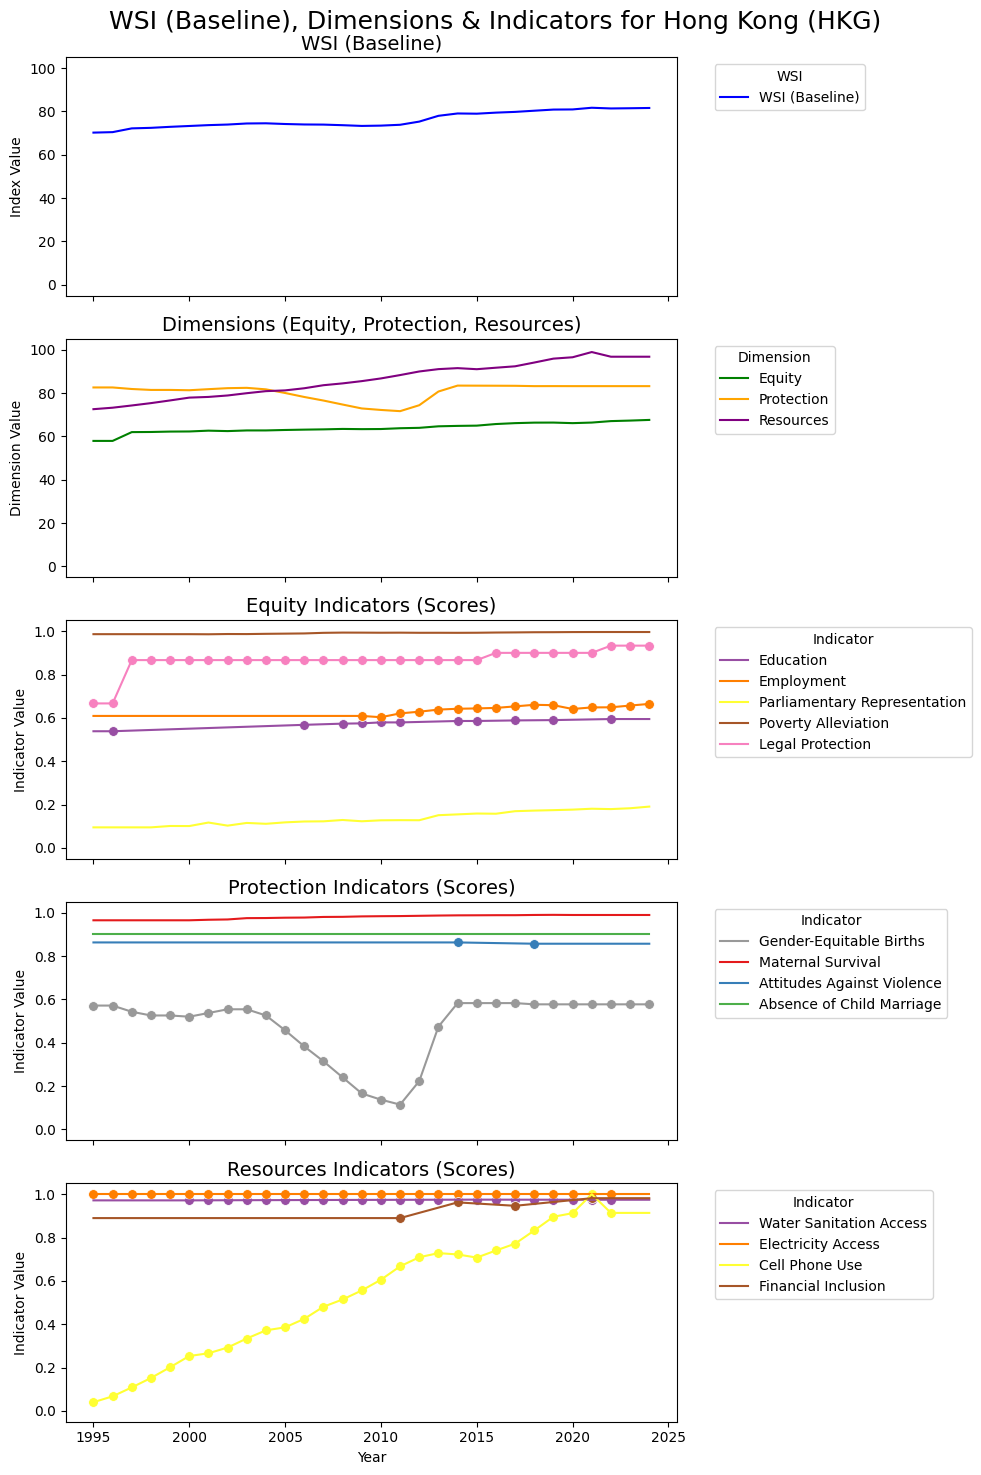

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from wsi.utils import processed_data_path, imgs_path
from wsi.config import INDICATORS, RENAME_INDICATOR_SCORE

# --- Prepare columns and dimensions ---
indicator_columns = list(INDICATORS.keys())

dimension_indicators = {}
for ind, meta in INDICATORS.items():
    dim = meta['dimension']
    dimension_indicators.setdefault(dim, []).append(ind)
dimensions = list(dimension_indicators.keys())

# --- Load the processed WSI data ---
df = pd.read_csv(processed_data_path("womens_safety_index_baseline.csv"))

# --- Color setup ---
all_indicators = dimensions + indicator_columns
color_palette = sns.color_palette("Set1", len(all_indicators))
indicator_colors = dict(zip(all_indicators, color_palette))

# --- Plotting function ---
def plot_country_index(merged_df):
    for iso_code in merged_df['ISO_code'].unique():
        country_data = merged_df[merged_df['ISO_code'] == iso_code]
        country_name = country_data['Economy'].iloc[0]

        fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True,
                                 gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})
        fig.suptitle(f"WSI (Baseline), Dimensions & Indicators for {country_name} ({iso_code})", fontsize=18)

        # --- WSI Baseline Plot ---
        sns.lineplot(x='Year', y="WSI (Baseline)", data=country_data, color='blue', label="WSI (Baseline)", ax=axes[0])
        axes[0].set_title("WSI (Baseline)", fontsize=14)
        axes[0].set_ylabel("Index Value")
        axes[0].set_ylim(0, 1)
        axes[0].legend(title="WSI", bbox_to_anchor=(1.05, 1), loc='upper left')

        # --- Dimension Plot ---
        for dim, color in zip(dimensions, ['green', 'orange', 'purple']):
            if dim in country_data.columns:
                sns.lineplot(x='Year', y=dim, data=country_data, label=dim, color=color, ax=axes[1])
        axes[1].set_title("Dimensions (Equity, Protection, Resources)", fontsize=14)
        axes[1].set_ylabel("Dimension Value")
        axes[1].set_ylim(0, 1)
        axes[1].legend(title="Dimension", bbox_to_anchor=(1.05, 1), loc='upper left')

        # --- Indicator Score Plots ---
        for idx, dim in enumerate(dimensions, start=2):
            for ind in dimension_indicators[dim]:
                score_name = RENAME_INDICATOR_SCORE[ind]
                score_col = f"{score_name} (score)"
                source_col = f"{score_name} (source)"
                if score_col in country_data:
                    sns.lineplot(x='Year', y=score_col, data=country_data,
                                 label=score_name, color=indicator_colors.get(ind, 'grey'), ax=axes[idx])
                    if source_col in country_data:
                        ori_data = country_data[country_data[source_col] == 'ORI']
                        if not ori_data.empty:
                            sns.scatterplot(x='Year', y=score_col, data=ori_data,
                                            s=50, edgecolor='white',
                                            color=indicator_colors.get(ind, 'grey'), ax=axes[idx])
            axes[idx].set_title(f"{dim} Indicators (Scores)", fontsize=14)
            axes[idx].set_ylabel("Indicator Value")
            axes[idx].set_ylim(0, 1)
            axes[idx].legend(title="Indicator", bbox_to_anchor=(1.05, 1), loc='upper left')

        for i, ax in enumerate(axes):
            if i < 2:
                ax.set_ylim(-5, 105)       # Top two plots
            else:
                ax.set_ylim(-0.05, 1.05)   # Bottom three plots
        plt.tight_layout()

        safe_country = re.sub(r"[^\w\s-]", "", country_name).replace(" ", "_")
        filename = f"{safe_country}_baseline_indicators.png"
        filepath = imgs_path("baseline_indicators", filename)
        print(f"Saving to: {filepath}")
        plt.savefig(filepath, dpi=300)
        plt.close()

# --- Run the plotting function ---
plot_country_index(df)
